In [13]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import exploration_modules as expo
import importlib
# 
importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)
importlib.reload(expo)

<module 'exploration_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\exploration_modules.py'>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# set configuration
sample_size, nr_sample_sets, nr_moments = 1000, 20, 4
n_folds = 5
test_size = 0.2

In [43]:
sample_size, nr_sample_sets, nr_moments = 1000, 1, 4
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample_sets, sample_size)

In [57]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample_sets, sample_size)

(0.0, 30.0)

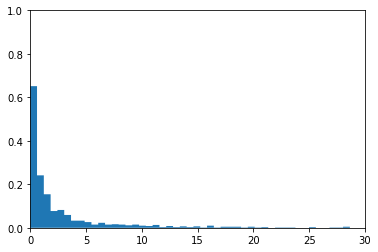

In [68]:
fig, ax = plt.subplots()
sample = heavytail_samples.iloc[2,:-1]
ax.hist(sample, density=True, histtype='stepfilled', bins='auto')
plt.ylim(0,1)
plt.xlim(0,30)

(0.0, 30.0)

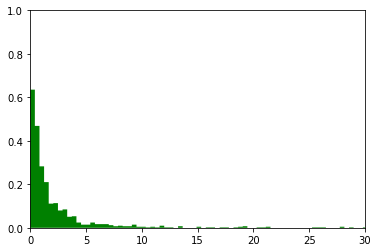

In [69]:
fig, ax = plt.subplots()
sample = heavytail_samples.iloc[0,:-1]
ax.hist(sample, density=True, histtype='stepfilled', bins='auto', color='green')
plt.ylim(0,1)
plt.xlim(0,30)

In [52]:
data = dm.get_samples_flex(bounded_dists, 1, 1000)

(0.0, 1.0)

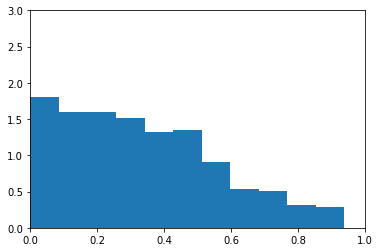

In [56]:
sample = data['sample_set'][0].tolist()
plt.hist(sample, density=True, histtype='stepfilled', bins='auto')
plt.ylim(0,3)
plt.xlim(0,1)

(0.0, 1.0)

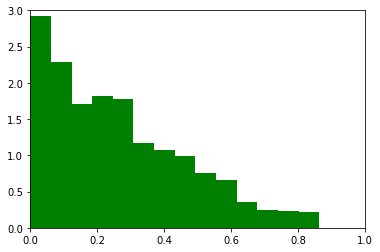

In [55]:
sample = data['sample_set'][1].tolist()
plt.hist(sample, density=True, histtype='stepfilled', bins='auto', color='green')
plt.ylim(0,3)
plt.xlim(0,1)

## Bounded distributions

### same number of elements

In [17]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample_sets, sample_size)
#dm.plot_histograms_of_samples(bounded_samples)

In [9]:
moments_df = dem.get_moments(bounded_samples, nr_moments)
moments_df.head(3)

,m1,m2,m3,m4,label
0,0.328803,0.054296,0.006966,0.006937,beta_1_2
1,0.325356,0.056483,0.008560,0.008081,beta_1_2
2,0.314695,0.054682,0.008226,0.007484,beta_1_2


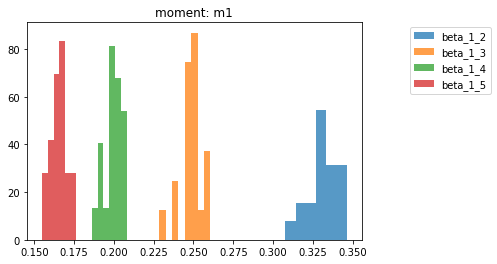

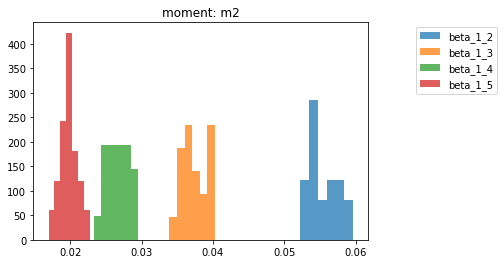

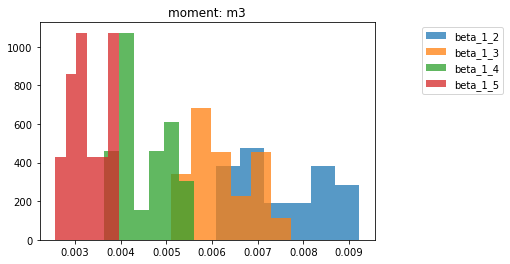

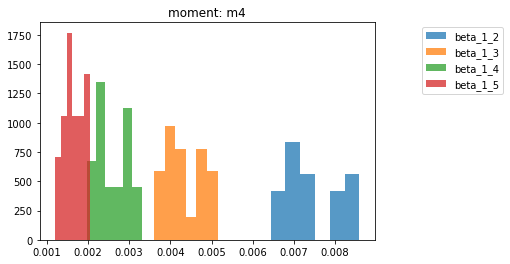

In [10]:
dem.get_histogram_of_moments(moments_df)

In [11]:
sample_size_list = [5, 10, 50, 100, 500, 1000]
nr_moments_list = np.arange(1,21)

#### SVM

In [9]:
cost = [0.01, 0.1, 0.5, 1, 5, 10]
gamma = [0.01, 0.1, 1, 5, 10]

In [10]:
res_svm = cm.cv_samplesize_moments_svm(sample_size_list, nr_moments_list, bounded_dists, nr_sample_sets, n_folds, test_size, cost, gamma)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

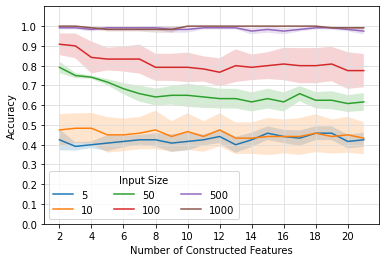

In [11]:
cm.plot_cv_moments_v2(res_svm)

#### Logistic Regression

In [12]:
C = [0.01, 0.1, 0.5, 1, 5, 10]

In [13]:
res_lr = cm.cv_samplesize_moments_lr(sample_size_list, nr_moments_list, bounded_dists, nr_sample_sets, n_folds, test_size, C)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

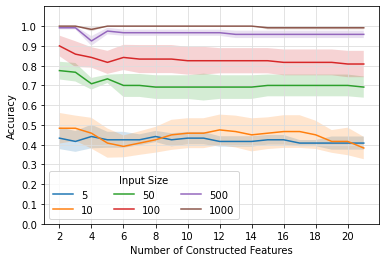

In [14]:
cm.plot_cv_moments_v2(res_lr)

### Varying number of elements

#### SVM

In [12]:
res_flex_svm = cm.cv_samplesize_moments_svm(sample_size_list, nr_moments_list, bounded_dists, nr_sample_sets, n_folds, test_size, cost, gamma, flex=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

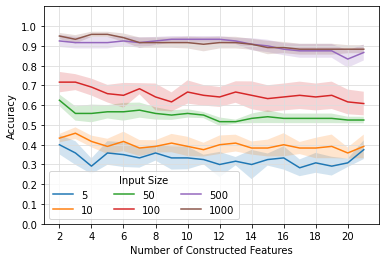

In [16]:
cm.plot_cv_moments_v2(res_flex_svm)

#### Logistic regression

In [17]:
res_flex_lr = cm.cv_samplesize_moments_lr(sample_size_list, nr_moments_list, bounded_dists, nr_sample_sets, n_folds, test_size, C, flex=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

C:\Users\shfar\Desktop\SU\Thesis\thesis\classification_modules.py:239: RuntimeWarning: divide by zero encountered in log
  loss = loss - np.log(sum(one_hot_matrix[j]*prob_row))
C:\Users\shfar\Desktop\SU\Thesis\thesis\classification_modules.py:239: RuntimeWarning: divide by zero encountered in log
  loss = loss - np.log(sum(one_hot_matrix[j]*prob_row))
C:\Users\shfar\Desktop\SU\Thesis\thesis\classification_modules.py:239: RuntimeWarning: divide by zero encountered in log
  loss = loss - np.log(sum(one_hot_matrix[j]*prob_row))
C:\Users\shfar\Desktop\SU\Thesis\thesis\classification_modules.py:239: RuntimeWarning: divide by zero encountered in log
  loss = loss - np.log(sum(one_hot_matrix[j]*prob_row))
C:\Users\shfar\Desktop\SU\Thesis\thesis\classification_modules.py:239: RuntimeWarning: divide by zero encountered in log
  loss = loss - np.log(sum(one_hot_matrix[j]*prob_row))
C:\Users\shfar\Desktop\SU\Thesis\thesis\classification_modules.py:239: RuntimeWarning: divide by zero encountered i

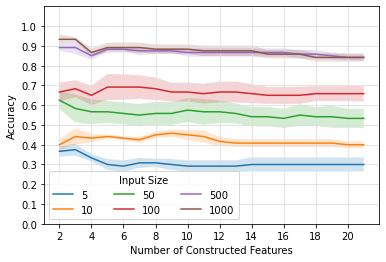

In [24]:
cm.plot_cv_moments_v2(res_flex_lr)

In [12]:
c_vector = [0.01, 0.1, 0.5, 1, 5, 10]
n_folds = 5
data = dm.get_samples_flex(bounded_dists, 20, 5)
data

,sample_set,len,label
0,[0.3136208278214952],1,beta_1_2
1,"[0.2740346441664781, 0.11646258557783584]",2,beta_1_2
2,"[0.5242401761034906, 0.11559386939648097, 0.02...",3,beta_1_2
3,"[0.17123319383897645, 0.142519774003839]",2,beta_1_2
4,"[0.2913250410812569, 0.04328116914623929, 0.32...",3,beta_1_2
...,...,...,...
75,"[0.05270145675896166, 0.2047236536635063, 0.04...",5,beta_1_5
76,"[0.11663890280721961, 0.24847265110431316]",2,beta_1_5
77,"[0.3488182471025885, 0.26796439644404135, 0.51...",4,beta_1_5
78,"[0.029919011287146514, 0.3790265991624738, 0.5...",5,beta_1_5


In [27]:
from functools import partial
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [16]:
m = 3
partial_moments = partial(dem.get_moments_partial, nr_moments=m)
moments_res = data['sample_set'].apply(partial_moments)
moments_df = pd.DataFrame(moments_res.tolist())
moments_df['label'] = data['label']
moments_df            

,0,1,2,label
0,0.313621,0.000000,0.000000e+00,beta_1_2
1,0.195249,0.006207,0.000000e+00,beta_1_2
2,0.221490,0.047208,6.311157e-03,beta_1_2
3,0.156876,0.000206,-8.682088e-21,beta_1_2
4,0.219027,0.015605,-1.314412e-03,beta_1_2
...,...,...,...,...
75,0.121124,0.006808,2.457776e-04,beta_1_5
76,0.182556,0.004345,0.000000e+00,beta_1_5
77,0.369684,0.008504,5.722993e-04,beta_1_5
78,0.244067,0.040958,2.220413e-03,beta_1_5


In [18]:
score = cm.lr_model_m(moments_df, n_folds, c_vector)
score

[0.25, 0.25, 0.3125, 0.375, 0.3125]

In [29]:
C = [0.1]
X = moments_df.iloc[:, :-1]
y = moments_df.iloc[:,-1]
train_index_list, test_index_list = cm.split_n_folds(data, n_folds)

In [30]:
result = list()
for c in C:
    cv_error = list()
    for i in range(1):
        X_train = X.iloc[train_index_list[i]]
        y_train = y.iloc[train_index_list[i]]
        X_test = X.iloc[test_index_list[i]]
        y_test = y.iloc[test_index_list[i]]
        y_test = y_test.reset_index(drop=True)
 
        # standardize the data
        scaler_train = StandardScaler()
        scaler_train.fit(X_train)
        X_train_scaled = scaler_train.transform(X_train)
        X_test_scaled = scaler_train.transform(X_test)
        clf_lr = LogisticRegression(penalty ='l2', C=c, class_weight='balanced', multi_class='ovr')
        clf_lr.fit(X_train_scaled, y_train)
        prob = clf_lr.predict_proba(X_test_scaled)
        pred = clf_lr.predict(X_test_scaled)
            
        one_hot_matrix = list()
        for l in range(len(y_test)):
            one_hot_matrix.append(list((y_test[l] == clf_lr.classes_ )*1))
        loss = 0
        for j in range(len(y_test)):
            prob_row = prob[j]
            loss = loss - np.log(sum(one_hot_matrix[j]*prob_row))

        loss = loss/len(y_test)
        cv_error.append(loss)
        result.append( dict(zip(['cv_error','lambda'],[loss, 1/c]))) 
result_df = pd.DataFrame(result)


In [33]:
sum(one_hot_matrix[j]*prob_row)

0.27157161367980964

In [ ]:
# find the best model, using one standard error rule
res_agg = result_df.groupby(['lambda'], as_index=False).agg({'cv_error':['mean','std']})
res_agg.columns = ['lambda','mean','std']
res_agg['se']=res_agg['std']/np.sqrt(n_folds)
min_err_index = np.argmin(res_agg['mean'])
threshold = res_agg['mean'][min_err_index] + res_agg['se'][min_err_index]
models = res_agg.loc[res_agg['mean']<=threshold]
models_lambda =list(models['lambda'])


### standardized

#### svm

In [20]:
res_st_svm = cm.cv_samplesize_moments_svm(sample_size_list, nr_moments_list, bounded_dists, nr_sample_sets, n_folds, test_size, cost, gamma, standardize = True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

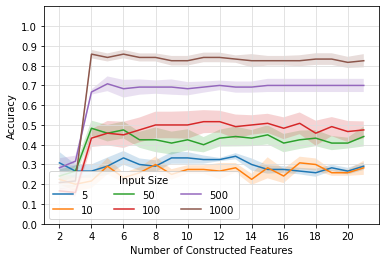

In [21]:
cm.plot_cv_moments_v2(res_st_svm)

#### logistic regression

In [22]:
res_st_lr = cm.cv_samplesize_moments_lr(sample_size_list, nr_moments_list, bounded_dists, nr_sample_sets, n_folds, test_size, C, standardize = True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

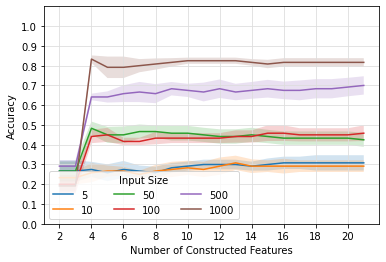

In [23]:
cm.plot_cv_moments_v2(res_st_lr)

## Heavytail distributions

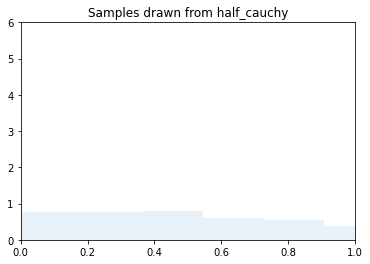

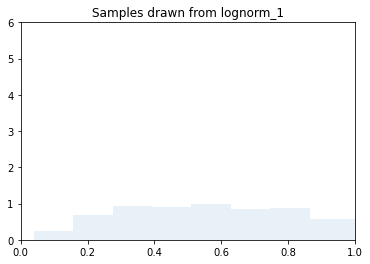

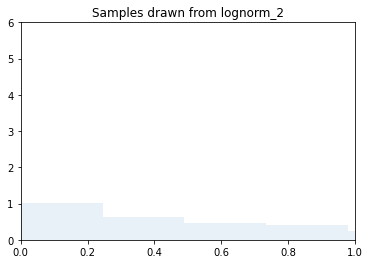

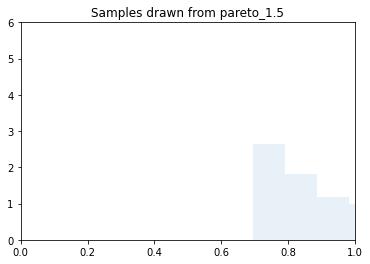

In [36]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample_sets, sample_size, transform = True)
dm.plot_histograms_of_samples(heavytail_samples)

In [26]:
nr_moments=1
moments_df = dem.get_moments(heavytail_samples, nr_moments)
moments_df.head(3)

,m1,label
0,0.856877,cauchy
1,0.751252,cauchy
2,0.961129,cauchy


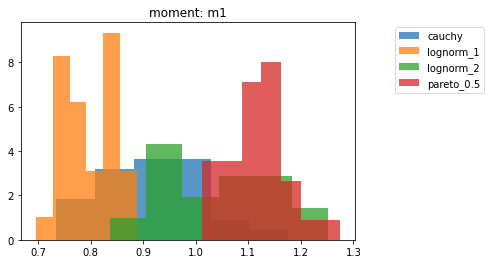

In [27]:
dem.get_histogram_of_moments(moments_df)

#### SVM

In [28]:
res_ht_svm = cm.cv_samplesize_moments_svm(sample_size_list, nr_moments_list, heavytail_dists, nr_sample_sets, n_folds, test_size, cost, gamma, transform=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

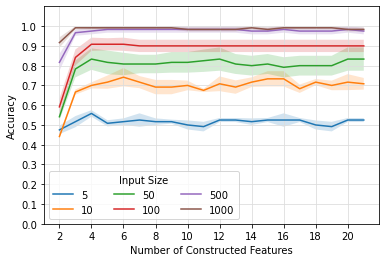

In [29]:
cm.plot_cv_moments_v2(res_ht_svm)

In [30]:
res_ht_svm = cm.cv_samplesize_moments_svm(sample_size_list, nr_moments_list, heavytail_dists, nr_sample_sets, n_folds, test_size, cost, gamma)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

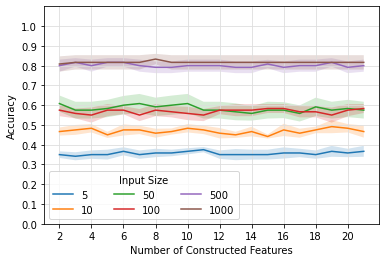

In [31]:
cm.plot_cv_moments_v2(res_ht_svm)

#### Logistic Regression

In [32]:
res_ht_lr = cm.cv_samplesize_moments_lr(sample_size_list, nr_moments_list, heavytail_dists, nr_sample_sets, n_folds, test_size, C, transform=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

C:\Users\shfar\Desktop\SU\Thesis\thesis\classification_modules.py:239: RuntimeWarning: divide by zero encountered in log
  loss = loss - np.log(sum(one_hot_matrix[j]*prob_row))
C:\Users\shfar\Desktop\SU\Thesis\thesis\classification_modules.py:239: RuntimeWarning: divide by zero encountered in log
  loss = loss - np.log(sum(one_hot_matrix[j]*prob_row))
C:\Users\shfar\Desktop\SU\Thesis\thesis\classification_modules.py:239: RuntimeWarning: divide by zero encountered in log
  loss = loss - np.log(sum(one_hot_matrix[j]*prob_row))
C:\Users\shfar\Desktop\SU\Thesis\thesis\classification_modules.py:239: RuntimeWarning: divide by zero encountered in log
  loss = loss - np.log(sum(one_hot_matrix[j]*prob_row))
C:\Users\shfar\Desktop\SU\Thesis\thesis\classification_modules.py:239: RuntimeWarning: divide by zero encountered in log
  loss = loss - np.log(sum(one_hot_matrix[j]*prob_row))
C:\Users\shfar\Desktop\SU\Thesis\thesis\classification_modules.py:239: RuntimeWarning: divide by zero encountered i

C:\Users\shfar\Desktop\SU\Thesis\thesis\classification_modules.py:239: RuntimeWarning: divide by zero encountered in log
  loss = loss - np.log(sum(one_hot_matrix[j]*prob_row))
C:\Users\shfar\Desktop\SU\Thesis\thesis\classification_modules.py:239: RuntimeWarning: divide by zero encountered in log
  loss = loss - np.log(sum(one_hot_matrix[j]*prob_row))
C:\Users\shfar\Desktop\SU\Thesis\thesis\classification_modules.py:239: RuntimeWarning: divide by zero encountered in log
  loss = loss - np.log(sum(one_hot_matrix[j]*prob_row))
C:\Users\shfar\Desktop\SU\Thesis\thesis\classification_modules.py:239: RuntimeWarning: divide by zero encountered in log
  loss = loss - np.log(sum(one_hot_matrix[j]*prob_row))
C:\Users\shfar\Desktop\SU\Thesis\thesis\classification_modules.py:239: RuntimeWarning: divide by zero encountered in log
  loss = loss - np.log(sum(one_hot_matrix[j]*prob_row))
C:\Users\shfar\Desktop\SU\Thesis\thesis\classification_modules.py:239: RuntimeWarning: divide by zero encountered i

IndexError: list index out of range

In [ ]:
cm.plot_cv_moments_v2(res_ht_lr)

In [54]:
res_ht_lr

,nr_moments,sample_size,mean,std,se,nr_features
0,1,5,0.291667,0.041667,0.018634,2
1,1,10,0.408333,0.061802,0.027639,2
2,1,50,0.541667,0.051031,0.022822,2
3,1,100,0.591667,0.099478,0.044488,2
4,1,500,0.833333,0.051031,0.022822,2
5,1,1000,0.925000,0.068465,0.030619,2
6,2,5,0.600000,0.037268,0.016667,3
7,2,10,0.650000,0.047507,0.021246,3
8,2,50,0.808333,0.086402,0.038640,3
9,2,100,0.841667,0.074536,0.033333,3


### Multi-modal

In [32]:
nr_modes = 5
nr_sample_sets = 20
nr_mm_dist = 10
sample_size=100

In [33]:
mm_df= dm.get_multimodal_dists(nr_mm_dist, nr_sample_sets, nr_modes, sample_size)
moments_df = dem.get_moments(mm_df, 10)
moments_df.head(3)

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,label
0,6.316580,5.468673,1.320971,58.677928,-2.165480,969.651244,-492.415030,20433.416940,-18624.981999,4.890857e+05,Dist 01
1,6.283168,5.479111,0.847752,62.133076,-2.912453,1083.288959,-351.615718,24136.477918,-12654.661280,6.098784e+05,Dist 01
2,6.345198,5.664053,0.195211,76.429417,-79.823619,1808.351742,-4935.204525,58154.963095,-243510.555939,2.177646e+06,Dist 01


#### SVM

In [34]:
res_mm_svm = cm.cv_samplesize_moments_svm_mm(sample_size_list, nr_moments_list, nr_sample_sets, nr_mm_dist, nr_modes, n_folds, test_size, cost, gamma)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

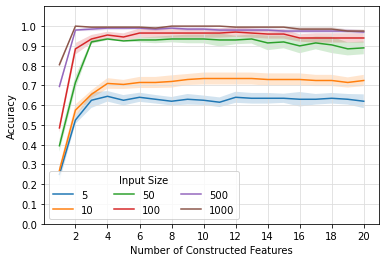

In [35]:
cm.plot_cv_moments_v2(res_mm_svm)

#### Logistic Regression

In [36]:
res_mm_lr = cm.cv_samplesize_moments_lr_mm(sample_size_list, nr_moments_list, nr_sample_sets, nr_mm_dist, nr_modes, n_folds, test_size, C)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

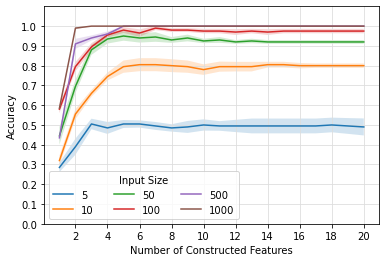

In [37]:
cm.plot_cv_moments_v2(res_mm_lr)

In [38]:
res_svm.to_csv('results/moments/res_svm_bounded.csv')
res_flex_svm.to_csv('results/moments/res_svm_bounded_flex.csv')
res_ht_svm.to_csv('results/moments/res_svm_heavytail.csv')
res_mm_svm.to_csv('results/moments/res_svm_multimodal.csv')

res_lr.to_csv('results/moments/res_lr_bounded.csv')
res_flex_lr.to_csv('results/moments/res_svm_bounded_flex.csv')
res_ht_lr.to_csv('results/moments/res_lr_heavytail.csv')
res_mm_lr.to_csv('results/moments/res_lr_multimodal.csv')

# figures for report

In [6]:
cost = [0.01, 0.1, 0.5, 1, 3, 5, 7, 10]
gamma = [0.01, 0.1, 1, 5, 10]

In [114]:
# set configuration
sample_size, nr_sample_sets, nr_moments = 100, 20, 5
n_folds = 5
test_size = 0.2

bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample_sets, sample_size)

moments_df = dem.get_moments(bounded_samples, nr_moments)
moments_df.head(3)

,m1,m2,m3,m4,m5,label
0,0.320220,0.057638,0.008811,0.008488,0.003066,beta_1_2
1,0.320307,0.053861,0.005825,0.005708,0.001405,beta_1_2
2,0.310869,0.045293,0.008445,0.006562,0.002707,beta_1_2


In [115]:
#grid search svm
best_cost, best_gamma, result = cm.grid_search_svm(moments_df, 5, cost, gamma)

In [31]:
best_cost

5.0

In [32]:
best_gamma

0.1

In [116]:
res_agg = result.groupby(['cost','gamma'], as_index=False).agg({'cv_error':['mean','std']})
res_agg.columns = ['cost','gamma','mean','std']
res_agg['se']=res_agg['std']/np.sqrt(5)

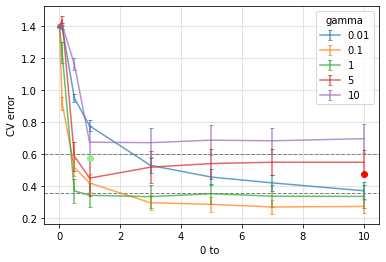

In [118]:
plt.figure()
for i in range(len(gamma)):
    data = res_agg.loc[res_agg['gamma']==gamma[i]]
    plt.errorbar(x=data['cost'], y=data['mean'], yerr=data['se'], label=gamma[i], capsize=2, alpha=0.7)
    
#sns.scatterplot(x=10, y=0, color='black')
threshold_up = 0.478019 + 0.121844
threshold_down = 0.478019 - 0.121844
plt.axhline(y=threshold_up, ls='--', color='grey',linewidth=1)
plt.axhline(y=threshold_down, ls='--', color='grey',linewidth=1)
plt.scatter([10], [0.478019], color='red', zorder=10)
plt.scatter([1], [0.575892], color='lightgreen', zorder=10)
plt.legend(title='gamma')
plt.xlabel('0 to ')
plt.ylabel('CV error')
plt.grid(color='#DDDDDD')
plt.show()

In [45]:
res_agg

,cost,gamma,mean,std,se
0,0.01,0.01,1.402773,0.027425,0.012265
1,0.01,0.10,1.413632,0.013529,0.006050
2,0.01,1.00,1.408256,0.012939,0.005786
3,0.01,5.00,1.401430,0.007500,0.003354
4,0.01,10.00,1.409216,0.025616,0.011456
5,0.10,0.01,1.402978,0.025295,0.011312
6,0.10,0.10,0.970155,0.069926,0.031272
7,0.10,1.00,0.764633,0.068207,0.030503
8,0.10,5.00,1.456619,0.103876,0.046455
9,0.10,10.00,1.436773,0.016067,0.007186


In [174]:
C = [0.001, 0.01, 0.1, 0.2, 1, 2, 5, 7, 10]

In [175]:
lambda_, result = cm.grid_search_lr(moments_df, 5, C)

In [176]:
lambda_

0.1

In [177]:
res_agg = result.groupby(['lambda'], as_index=False).agg({'cv_error':['mean','std'], 'acc':['mean','std']})
res_agg.columns = ['lambda','cv_error_mean','cv_error_std','acc_mean','acc_std']
res_agg['cv_error_se']=res_agg['cv_error_std']/np.sqrt(5)
res_agg['C']=1/res_agg['lambda']
res_agg

,lambda,cv_error_mean,cv_error_std,acc_mean,acc_std,cv_error_se,C
0,0.100000,0.595395,0.089608,0.825000,0.157012,0.040074,10.000
1,0.142857,0.614482,0.083607,0.825000,0.157012,0.037390,7.000
2,0.200000,0.633906,0.078484,0.825000,0.157012,0.035099,5.000
3,0.500000,0.693645,0.067229,0.841667,0.139443,0.030066,2.000
4,1.000000,0.744323,0.060833,0.850000,0.149071,0.027205,1.000
5,5.000000,0.872628,0.049128,0.816667,0.173305,0.021971,0.200
6,10.000000,0.931599,0.047270,0.775000,0.140064,0.021140,0.100
7,100.000000,1.138112,0.025273,0.650000,0.075691,0.011302,0.010
8,1000.000000,1.321189,0.003484,0.591667,0.099478,0.001558,0.001


In [178]:
(2*np.log(2))

1.3862943611198906

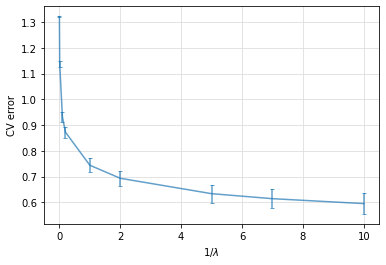

In [197]:
#plt.figure(figsize=(12, 8))
plt.errorbar(x=res_agg['C'], y=res_agg['cv_error_mean'], yerr=res_agg['cv_error_se'], capsize=2, alpha=0.7)
    
#sns.scatterplot(x=10, y=0, color='black')
#threshold_up = 2.584197 + 0.061599*4
#threshold_down = 2.584197 - 0.061599*4
#plt.axhline(y=threshold_up, ls='--', color='grey',linewidth=1)
#plt.axhline(y=threshold_down, ls='--', color='grey',linewidth=1)
#plt.scatter([5], [2.818729], color='red', zorder=10)
#plt.scatter([10], [2.584197], color='lightgreen', zorder=10)
#plt.xscale('log')
plt.xlabel('1/$\lambda$')
plt.ylabel('CV error')
plt.grid(color='#DDDDDD')
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [150]:
data = moments_df
c= 100
X = data.iloc[:, :-1]
y = data.iloc[:,-1]
train_index_list, test_index_list = cm.split_n_folds(data, n_folds)
result = list()
cv_error = list()
for i in range(n_folds):
    X_train = X.iloc[train_index_list[i]]
    y_train = y.iloc[train_index_list[i]]
    X_test = X.iloc[test_index_list[i]]
    y_test = y.iloc[test_index_list[i]]
    y_test = y_test.reset_index(drop=True)
 
    # standardize the data
    scaler_train = StandardScaler()
    scaler_train.fit(X_train)
    X_train_scaled = scaler_train.transform(X_train)
    X_test_scaled = scaler_train.transform(X_test)
    clf_lr = LogisticRegression(penalty ='l2', C=c, class_weight='balanced', multi_class='ovr')
    clf_lr.fit(X_train_scaled, y_train)
    prob = clf_lr.predict_proba(X_train_scaled)
    pred = clf_lr.predict(X_train_scaled)
    
    one_hot_matrix = list()
    for i in range(len(y_test)):
        one_hot_matrix.append(list((y_test[i] == clf_lr.classes_ )*1))
    
    loss = 0
    acc= 0
    for j in range(len(y_test)):
        prob_row=prob[j]
        loss = loss - np.log(sum(one_hot_matrix[0]*prob_row))
        if y_test[j] == pred[j]:
            acc = acc + 1
    loss = loss/len(y_test)
    acc = acc / len(y_test)
    
    cv_error.append(loss)
    result.append( dict(zip(['cv_error','lambda','acc'],[loss, 1/c, acc]))) 
result_df = pd.DataFrame(result)

In [151]:
result_df

,cv_error,lambda,acc
0,0.175095,0.01,0.25
1,0.185571,0.01,0.25
2,0.161045,0.01,0.25
3,0.194558,0.01,0.25
4,0.151411,0.01,0.25
